In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Un casino tiene dos tipos de monedas una justa (J) y una sesgada (B), las probabilidades de obtener cara y sello son: Pj = [0.5,0.5] y  Pb = [0.9,0.1] respectivamente.El tipo de moneda se esoge siguiendo esta ley de transición:

In [2]:
T = np.array([[0.8,0.2],[0.2,0.8]])

Por otro lado, la matriz de emisión está dada por:

In [3]:
E = np.array([[0.5,0.9],[0.5,0.1]])

Se realiza un experimento de 8 lanzamientos y se obtiene la siguiente secuencia: [S,C,C,C,S,C,S,C].

a.) Use la distribución de probabilidad a-priori para la moneda justa y sesgada [0.2,0.8]

In [4]:
# Definimos estados y priors
Monedas = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

DictM = {0:'Justa',1:'Sesgada'} 
Dict0= {0: 'Cara', 1:'Sello'}

In [5]:
#Secuencia Observada

Obs = np.array([1,0,0,0,1,0,1,0])

b.) Encuentra la secuencia oculta más probable del tipo de moneda que se elegió en cada lanzamiento y su respectiva probabilidad P.

In [6]:
def GetMonedas(Monedas,N):
    
    CMonedas = list( combinations_with_replacement(Monedas,N) )
    
    print(CMonedas)
    
    Permu = []
    
    for it in CMonedas:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [7]:
HiddenMonedas = GetMonedas(Monedas,8)
HiddenMonedas

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [8]:
def GetProb(T,E,Obs,Monedas,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[Monedas[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ Monedas[i+1], Monedas[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], Monedas[i] ]
        
    return p

In [9]:
P = np.zeros(HiddenMonedas.shape[0], dtype=np.float64)

In [10]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenMonedas[i],Prior)
    
print(P)

[1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.03680000e-07 2.88000000e-09 4.14720000e-07 9.33120000e-07
 2.59200000e-08 2.332800

In [11]:
p_ob_suma = []

for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenMonedas[i],Prior)
    suma = np.sum(P[i])
    
    p_ob_suma.append(suma)
    
print(p_ob_suma)

[0.00016384000000000008, 7.372800000000004e-05, 2.048000000000001e-06, 1.843200000000001e-05, 2.048000000000001e-06, 1.843200000000001e-05, 1.843200000000001e-05, 1.843200000000001e-05, 3.2768000000000016e-05, 1.4745600000000007e-05, 8.294400000000005e-06, 3.686400000000002e-06, 9.216000000000004e-07, 2.5600000000000014e-08, 3.6864000000000017e-06, 8.294400000000005e-06, 2.3040000000000013e-07, 2.073600000000001e-06, 3.686400000000002e-06, 8.294400000000005e-06, 2.3040000000000013e-07, 2.073600000000001e-06, 2.3040000000000013e-07, 3.317760000000002e-05, 8.294400000000005e-06, 2.3040000000000013e-07, 2.073600000000001e-06, 2.3040000000000013e-07, 2.073600000000001e-06, 3.317760000000002e-05, 1.4745600000000007e-05, 4.0960000000000023e-07, 3.6864000000000017e-06, 4.0960000000000023e-07, 3.6864000000000017e-06, 3.6864000000000017e-06, 5.898240000000003e-05, 2.6542080000000017e-05, 1.843200000000001e-07, 1.6588800000000008e-06, 7.372800000000004e-07, 1.658880000000001e-06, 9.3312000000000

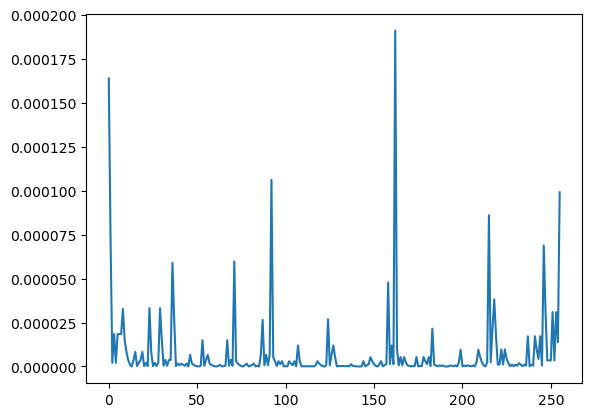

In [12]:
plt.plot(P)

In [28]:
ii = np.where( P == np.amax(P))

print("El estado oculto más probable es: {0}, este valor corresponde a [B,B,B,B,J,J,J,J]. \nLa probabilidad de este estado es {1}".format(HiddenMonedas[ii],P[ii]))


El estado oculto más probable es: [[1 1 1 1 0 0 0 0]], este valor corresponde a [B,B,B,B,J,J,J,J]. 
La probabilidad de este estado es [0.0001911]


In [ ]:
np.sum(P)

0.0019344381513984013

c.) Calcule las probabilidades de cada estado observable (o) como la suma de las probabilidades de todos los estados ocultos. 

In [ ]:
ObsMonedas = GetMonedas([0,1],8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [ ]:
ObsMonedas

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
Nobs = ObsMonedas.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenMonedas.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsMonedas[j],HiddenMonedas[i],Prior)
        
    PObs[j] = np.sum(P)
    
    print("La probabilidad de que salga la observación {0} es de {1}".format(ObsMonedas[j],PObs[j]))

La probabilidad de que salga la observación [0 0 0 0 0 0 0 0] es de 0.13698241367042568
La probabilidad de que salga la observación [0 0 0 0 0 0 0 1] es de 0.041149206196454416
La probabilidad de que salga la observación [0 0 0 0 0 0 1 0] es de 0.034737299592422416
La probabilidad de que salga la observación [0 0 0 0 0 1 0 0] es de 0.03175272356682242
La probabilidad de que salga la observación [0 0 0 0 1 0 0 0] es de 0.03026766308682242
La probabilidad de que salga la observación [0 0 0 1 0 0 0 0] es de 0.02932287908682242
La probabilidad de que salga la observación [0 0 1 0 0 0 0 0] es de 0.02830811108682242
La probabilidad de que salga la observación [0 1 0 0 0 0 0 0] es de 0.02656789412682242
La probabilidad de que salga la observación [1 0 0 0 0 0 0 0] es de 0.022978176955622414
La probabilidad de que salga la observación [0 0 0 0 0 0 1 1] es de 0.018705156764697608
La probabilidad de que salga la observación [0 0 0 0 0 1 0 1] es de 0.01330001615669761
La probabilidad de que salga

d.) Verifique que la suma de todos los estados observables es  1.

In [ ]:
np.sum(PObs)

1.0000000000000007

e.) Depende el resultado de la probabilidad apriori.

Si, el resultado depende de la probabilidad apriori pues gracias a esta es posible determinar las probabilidades de los eventos ocultos.